In [32]:
# import the necessary libraries
import pandas as pd
from collections import Counter
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, confusion_matrix,plot_confusion_matrix
from keras.utils import to_categorical
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, confusion_matrix,plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import to_categorical

In [229]:
# import the main big dataset
spis = pd.read_csv('generatedDatasets/spotifyDatasetBig.csv', low_memory=False)
print(len(spis))
spis = spis.dropna()
print(len(spis))
spis = spis.drop_duplicates()
print(len(spis))
sam = spis.sample()
spis = spis.drop(['trackid', 'trackname', 'artist', 'artistid', 'genres'], axis = 1)

114404
114351
84307


#### Pick between full dataset, partial merged genres, or only two/three/four genre classification

###### If none of the two code blocks below is executed, then full dataset classification will take place

In [193]:
# Partial Merged Genres
spis['main_genre'] = spis['main_genre'].replace(['r&b', 'soul'], 'r&b / soul')
spis['main_genre'] = spis['main_genre'].replace(['hip-hop', 'rap'], 'hip-hop / rap')
spis['main_genre'] = spis['main_genre'].replace(['indie', 'alternative'], 'indie / alternative')
spis['main_genre'] = spis['main_genre'].replace(['punk', 'metal'], 'punk / metal')
spis['main_genre'] = spis['main_genre'].replace(['folk', 'country'], 'folk / country')
spis['main_genre'] = spis['main_genre'].replace(['blues', 'jazz'], 'blues / jazz')
spis['main_genre'] = spis['main_genre'].replace(['latin', 'dance'], 'latin / dance')

In [194]:
# Four / Three / Two Genre Classification
# ONLY ONE OF THE THREE FOLLOWING CODE LINES MUST BE EXECUTED
#spis = spis.loc[spis.main_genre.isin(['rap', 'classical'])]
#spis = spis.loc[spis.main_genre.isin(['indie', 'punk', 'latin'])]
#spis = spis.loc[spis.main_genre.isin(['rock', 'classical', 'jazz', 'metal'])]

In [230]:
spis.head()

,main_genre,danceability,energy,loudness,speechness,acousticness,instrumentalness,liveness,valence,tempo
0,rock,0.412,0.902,-11.600,0.4050,0.04840,0.131000,0.4050,0.422,89.740
1,rock,0.438,0.805,-6.237,0.0624,0.00255,0.000057,0.0842,0.564,113.253
2,rock,0.310,0.700,-5.678,0.0470,0.01100,0.009650,0.0828,0.763,188.386
3,rock,0.505,0.836,-7.384,0.1010,0.01030,0.077100,0.2950,0.764,159.669
4,rock,0.676,0.920,-7.960,0.0435,0.00101,0.000009,0.2480,0.624,126.341


#### Prepare & Process The Dataset For Machine Learning

In [231]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(spis['main_genre'])
lb = label_encoder.transform(spis['main_genre'])
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)
spis = spis.drop(['main_genre'], axis=1)

{'alternative': 0, 'blues': 1, 'classical': 2, 'country': 3, 'dance': 4, 'electronic': 5, 'folk': 6, 'hip-hop': 7, 'indie': 8, 'jazz': 9, 'latin': 10, 'metal': 11, 'pop': 12, 'punk': 13, 'r&b': 14, 'rap': 15, 'reggae': 16, 'rock': 17, 'soul': 18}


In [232]:
print(Counter(lb))
print(len(lb))

Counter({8: 5419, 18: 5040, 9: 5025, 11: 4973, 6: 4932, 13: 4821, 5: 4781, 12: 4714, 0: 4646, 2: 4491, 4: 4404, 7: 4396, 1: 4309, 3: 4039, 15: 3844, 17: 3778, 10: 3669, 16: 3587, 14: 3439})
84307


In [233]:
#X = spis.values
#X = MinMaxScaler().fit_transform(spis)
scaler = StandardScaler()
X = scaler.fit_transform(spis)

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, lb, test_size=0.2, random_state=0)

##### Naive Bayes

In [235]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.06      0.01      0.01       930
           1       0.17      0.03      0.05       786
           2       0.52      0.86      0.65       851
           3       0.11      0.73      0.18       771
           4       0.24      0.37      0.29       895
           5       0.35      0.30      0.32       941
           6       0.23      0.25      0.24       977
           7       0.18      0.03      0.05       863
           8       0.14      0.03      0.05      1103
           9       0.29      0.24      0.26      1043
          10       0.09      0.01      0.02       714
          11       0.40      0.63      0.49      1010
          12       0.00      0.00      0.00       977
          13       0.23      0.17      0.19       957
          14       0.18      0.10      0.13       718
          15       0.26      0.42      0.32       764
          16       0.23      0.33      0.27       755
          17       0.11    

##### Logistic Regression

In [236]:
clf = LogisticRegression(random_state=0,solver="newton-cg",n_jobs=-1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.15      0.12      0.13       930
           1       0.19      0.12      0.14       786
           2       0.67      0.78      0.72       851
           3       0.18      0.32      0.23       771
           4       0.25      0.39      0.30       895
           5       0.36      0.40      0.38       941
           6       0.23      0.37      0.29       977
           7       0.24      0.19      0.21       863
           8       0.14      0.10      0.11      1103
           9       0.39      0.35      0.37      1043
          10       0.11      0.06      0.08       714
          11       0.43      0.65      0.52      1010
          12       0.18      0.06      0.09       977
          13       0.25      0.35      0.29       957
          14       0.20      0.07      0.11       718
          15       0.28      0.35      0.31       764
          16       0.21      0.30      0.25       755
          17       0.17    

##### k Nearest Neighbors

In [237]:
neigh = KNeighborsClassifier(n_neighbors=4,n_jobs=-1,algorithm="auto",leaf_size=30,p=1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.20      0.12       930
           1       0.14      0.26      0.18       786
           2       0.63      0.81      0.71       851
           3       0.20      0.35      0.25       771
           4       0.23      0.36      0.28       895
           5       0.32      0.32      0.32       941
           6       0.19      0.20      0.20       977
           7       0.22      0.28      0.24       863
           8       0.11      0.08      0.09      1103
           9       0.40      0.31      0.35      1043
          10       0.13      0.10      0.11       714
          11       0.53      0.53      0.53      1010
          12       0.14      0.06      0.08       977
          13       0.33      0.24      0.28       957
          14       0.13      0.06      0.08       718
          15       0.23      0.17      0.19       764
          16       0.31      0.19      0.24       755
          17       0.13    

##### Random Forest

In [238]:
hyperpars_rf = dict(n_estimators=[100,120,140,160,180],criterion=['gini', 'entropy'], max_depth=[15,30,40,50])
rf = RandomForestClassifier()
clf = GridSearchCV(rf, hyperpars_rf, cv=5, verbose=0)
clf.estimator.fit(X_train, y_train)
y_pred = clf.estimator.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.09      0.10       930
           1       0.26      0.26      0.26       786
           2       0.71      0.82      0.76       851
           3       0.37      0.50      0.43       771
           4       0.29      0.31      0.30       895
           5       0.38      0.40      0.39       941
           6       0.26      0.30      0.27       977
           7       0.23      0.25      0.24       863
           8       0.19      0.18      0.18      1103
           9       0.42      0.45      0.43      1043
          10       0.15      0.10      0.12       714
          11       0.57      0.65      0.61      1010
          12       0.13      0.10      0.11       977
          13       0.36      0.36      0.36       957
          14       0.18      0.14      0.16       718
          15       0.23      0.30      0.26       764
          16       0.34      0.37      0.35       755
          17       0.12    

##### Decision Tree

In [239]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Create the classification report for both models
from sklearn.metrics import classification_report

# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(X, lb, random_state=10)

# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_features)
class_rep_tree = classification_report(test_labels, pred_labels_tree)
print("Decision Tree: \n", class_rep_tree)

Decision Tree: 
               precision    recall  f1-score   support

           0       0.08      0.10      0.09      1164
           1       0.16      0.18      0.17      1058
           2       0.67      0.66      0.67      1124
           3       0.28      0.27      0.28      1026
           4       0.18      0.21      0.20      1102
           5       0.26      0.24      0.25      1155
           6       0.17      0.17      0.17      1277
           7       0.15      0.18      0.16      1097
           8       0.11      0.11      0.11      1319
           9       0.31      0.31      0.31      1263
          10       0.11      0.12      0.11       899
          11       0.50      0.48      0.49      1239
          12       0.08      0.08      0.08      1165
          13       0.25      0.23      0.24      1201
          14       0.11      0.11      0.11       872
          15       0.18      0.16      0.17       991
          16       0.23      0.19      0.20       902
          

##### XGBoost

In [240]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

print(classification_report(y_test, y_pred))

/home/tasossf/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:36:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.16      0.10      0.12       930
           1       0.25      0.25      0.25       786
           2       0.72      0.80      0.76       851
           3       0.30      0.46      0.37       771
           4       0.29      0.36      0.32       895
           5       0.42      0.42      0.42       941
           6       0.26      0.30      0.28       977
           7       0.25      0.29      0.27       863
           8       0.18      0.17      0.17      1103
           9       0.43      0.45      0.44      1043
          10       0.15      0.09      0.12       714
          11       0.56      0.63      0.59      1010
          12       0.16      0.12      0.14 

##### Correlation and XGB Importance Plots

In [241]:
# Create a correlation matrix
corr_metrics = spis.corr()
corr_metrics.style.background_gradient()

,danceability,energy,loudness,speechness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.146849,0.286529,0.230233,-0.222778,-0.241231,-0.076341,0.467993,-0.093493
energy,0.146849,1.000000,0.811351,0.131618,-0.770930,-0.399943,0.205253,0.369068,0.223651
loudness,0.286529,0.811351,1.000000,0.141251,-0.669851,-0.572199,0.145716,0.344526,0.186982
speechness,0.230233,0.131618,0.141251,1.000000,-0.123895,-0.170017,0.081364,0.097250,0.059980
acousticness,-0.222778,-0.770930,-0.669851,-0.123895,1.000000,0.378641,-0.127381,-0.271613,-0.188573
instrumentalness,-0.241231,-0.399943,-0.572199,-0.170017,0.378641,1.000000,-0.097986,-0.304595,-0.098052
liveness,-0.076341,0.205253,0.145716,0.081364,-0.127381,-0.097986,1.000000,0.049560,0.040220
valence,0.467993,0.369068,0.344526,0.097250,-0.271613,-0.304595,0.049560,1.000000,0.087599
tempo,-0.093493,0.223651,0.186982,0.059980,-0.188573,-0.098052,0.040220,0.087599,1.000000


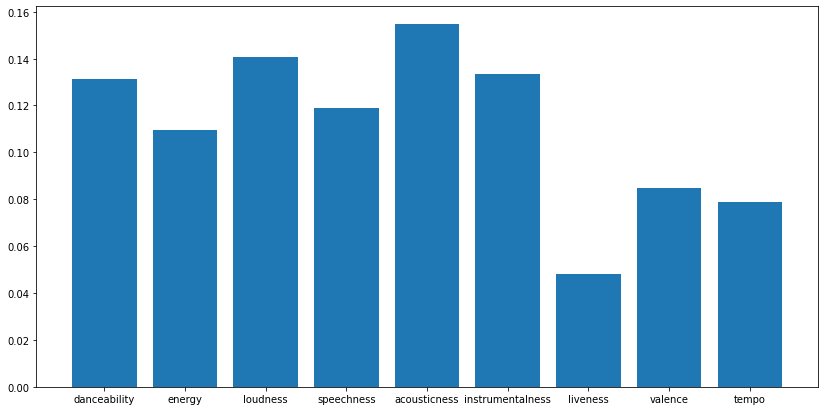

In [242]:
cols = spis.columns
# plot
plt.figure(figsize=(14,7))
plt.bar(cols, model.feature_importances_)
plt.show()

#### 2D Convolutional Neural Network

In [243]:
# https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

##### Further Processing & Data Preparation

In [244]:
train_X = X_train.reshape(-1, 3, 3, 1)
test_X = X_test.reshape(-1, 3, 3, 1)
train_Y = y_train
test_Y = y_test

In [245]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [246]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 12
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [247]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [248]:
bs = 8
eps = 60
nclasses = len(np.unique(lb))

##### The Main CNN

In [249]:
fmodel = Sequential()
# conv1d further experimentation in future work
fmodel.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(3,3,1)))
fmodel.add(LeakyReLU(alpha=0.1))
fmodel.add(MaxPooling2D((2, 2),padding='same'))
fmodel.add(Dropout(0.25))
fmodel.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fmodel.add(LeakyReLU(alpha=0.1))
fmodel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fmodel.add(Dropout(0.25))
fmodel.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fmodel.add(LeakyReLU(alpha=0.1))                  
fmodel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fmodel.add(Dropout(0.3))
fmodel.add(Flatten())
fmodel.add(Dense(128, activation='linear'))
fmodel.add(LeakyReLU(alpha=0.1))           
fmodel.add(Dropout(0.35))
fmodel.add(Dense(nclasses, activation='softmax'))

In [250]:
fmodel.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [251]:
#fmodel.summary()

##### Fit, Train & Evaluate

In [252]:
fmodelTrain = fmodel.fit(train_X, train_label, batch_size=bs,epochs=eps,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/60
6745/6745 [==============================] - 10s 2ms/step - loss: 2.6288 - accuracy: 0.1529 - val_loss: 2.3699 - val_accuracy: 0.2137
Epoch 2/60
6745/6745 [==============================] - 10s 1ms/step - loss: 2.3810 - accuracy: 0.2272 - val_loss: 2.2843 - val_accuracy: 0.2495
Epoch 3/60
6745/6745 [==============================] - 10s 1ms/step - loss: 2.3309 - accuracy: 0.2444 - val_loss: 2.2615 - val_accuracy: 0.2541
Epoch 4/60
6745/6745 [==============================] - 10s 1ms/step - loss: 2.3105 - accuracy: 0.2511 - val_loss: 2.2474 - val_accuracy: 0.2578
Epoch 5/60
6745/6745 [==============================] - 10s 1ms/step - loss: 2.2958 - accuracy: 0.2550 - val_loss: 2.2327 - val_accuracy: 0.2630
Epoch 6/60
6745/6745 [==============================] - 10s 2ms/step - loss: 2.2849 - accuracy: 0.2595 - val_loss: 2.2460 - val_accuracy: 0.2587
Epoch 7/60
6745/6745 [==============================] - 10s 2ms/step - loss: 2.2768 - accuracy: 0.2622 - val_loss: 2.2225 - val_ac

6745/6745 [==============================] - 10s 2ms/step - loss: 2.1993 - accuracy: 0.2894 - val_loss: 2.1482 - val_accuracy: 0.2919
Epoch 58/60
6745/6745 [==============================] - 10s 1ms/step - loss: 2.1944 - accuracy: 0.2883 - val_loss: 2.1372 - val_accuracy: 0.2999
Epoch 59/60
6745/6745 [==============================] - 10s 1ms/step - loss: 2.1983 - accuracy: 0.2853 - val_loss: 2.1389 - val_accuracy: 0.2937
Epoch 60/60
6745/6745 [==============================] - 10s 2ms/step - loss: 2.1949 - accuracy: 0.2874 - val_loss: 2.1425 - val_accuracy: 0.2951


In [253]:
test_eval = fmodel.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

527/527 [==============================] - 0s 819us/step - loss: 2.1546 - accuracy: 0.2954
Test loss: 2.1545581817626953
Test accuracy: 0.29539793729782104


In [254]:
predicted_classes = fmodel.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes.shape, test_Y.shape)

(16862,) (16862,)


In [255]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(nclasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.06      0.97      0.11       930
     Class 1       0.80      0.01      0.01       786
     Class 2       0.83      0.59      0.69       851
     Class 3       0.00      0.00      0.00       771
     Class 4       0.00      0.00      0.00       895
     Class 5       0.63      0.15      0.24       941
     Class 6       0.00      0.00      0.00       977
     Class 7       0.00      0.00      0.00       863
     Class 8       0.00      0.00      0.00      1103
     Class 9       0.67      0.04      0.07      1043
    Class 10       0.00      0.00      0.00       714
    Class 11       0.68      0.45      0.54      1010
    Class 12       0.00      0.00      0.00       977
    Class 13       0.83      0.03      0.05       957
    Class 14       0.00      0.00      0.00       718
    Class 15       0.00      0.00      0.00       764
    Class 16       0.00      0.00      0.00       755
    Class 17       0.00    

/home/tasossf/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
predictions_test = label_encoder.inverse_transform(predicted_classes)
print(predictions_test)

['alternative' 'alternative' 'alternative' ... 'alternative' 'alternative'
 'alternative']


#### Loading the Medium Dataset for Genre Prediction & Classification

In [269]:
meds = pd.read_csv('generatedDatasets/spotifyDatasetMed.csv', low_memory=False)
print(len(meds))
meds = meds.dropna()
print(len(meds))
meds = meds.drop_duplicates()
print(len(meds))
meds = meds.drop(['trackid', 'trackname', 'artist', 'artistid', 'genres'], axis = 1)

3794
3794
3785


In [270]:
label_encoder2 = preprocessing.LabelEncoder()
label_encoder2.fit(meds['main_genre'])
lbs = label_encoder2.transform(meds['main_genre'])
mapping2 = dict(zip(label_encoder2.classes_, range(len(label_encoder.classes_))))
print(mapping2)
ts = meds['main_genre']
meds = meds.drop(['main_genre'], axis=1)
print(Counter(lbs))
print(len(lbs))

{'alternative': 0, 'blues': 1, 'classical': 2, 'country': 3, 'dance': 4, 'electronic': 5, 'folk': 6, 'hip-hop': 7, 'indie': 8, 'jazz': 9, 'latin': 10, 'metal': 11, 'pop': 12, 'punk': 13, 'r&b': 14, 'rap': 15, 'reggae': 16, 'rock': 17, 'soul': 18}
Counter({17: 200, 5: 200, 7: 200, 1: 200, 13: 200, 18: 200, 16: 200, 3: 200, 8: 200, 0: 200, 2: 199, 15: 199, 9: 199, 11: 199, 14: 199, 4: 198, 6: 198, 12: 197, 10: 197})
3785


In [271]:
# check if the two label encoder (initial and second - for testing) are the same
if mapping == mapping2:
    print("yes")

yes


In [272]:
scaler = StandardScaler()
Xmeds = scaler.fit_transform(meds)
Xmeds = Xmeds.reshape(-1, 3, 3, 1)
Xmeds = Xmeds.astype('float32')
Xmeds = Xmeds / 255.

In [273]:
preds = fmodel.predict(Xmeds)
preds = np.argmax(np.round(preds),axis=1)

finalPreds = label_encoder.inverse_transform(preds)
print(len(finalPreds))
print(Counter(finalPreds))

3785
Counter({'alternative': 3484, 'classical': 133, 'metal': 107, 'electronic': 33, 'jazz': 23, 'punk': 4, 'blues': 1})


In [274]:
# save the predictions
with open('generatedDatasets/predictedGenresMed.txt', 'w') as f:
    for item in finalPreds:
        f.write("%s\n" % item)

In [275]:
# do a partial validation, although this way is not so accurate
cc = 0
ev = 0
for t in ts:
    if t == finalPreds[cc]:
        ev = ev + 1
    cc = cc +1
print("About", round((ev / len(ts)), 3), "% of the predicted values can be viewed as correct." )

About 0.095 % of the predicted values can be viewed as correct.
